# Welcome to Data Visualization!  

In this hands-on course, you'll learn how to take your data visualizations to the next level with [seaborn](https://seaborn.pydata.org/index.html), a powerful but easy-to-use data visualization tool.  To use seaborn, you'll also learn a bit about how to write code in Python, a popular programming language.  That said,
- the course is aimed at those with no prior programming experience, and
- each chart uses short and simple code, making seaborn much faster and easier to use than many other data visualization tools (_such as Excel, for instance_).  

So, if you've never written a line of code, and you want to learn the **_bare minimum_** to start making faster, more attractive plots today, you're in the right place!  To take a peek at some of the charts you'll make, check out the figures below.

![tut1_plots_you_make](https://storage.googleapis.com/kaggle-media/learn/images/54BoIBW.png)

# Your coding environment

Take the time now to scroll quickly up and down this page.  You'll notice that there are a lot of different types of information, including:
1. **text** (like the text you're reading right now!),
2. **code** (which is always contained inside a gray box called a **code cell**), and
2. **code output** (or the printed result from running code that always appears immediately below the corresponding code).

We refer to these pages as **Jupyter notebooks** (or, often just **notebooks**), and we'll work with them throughout the mini-course.  Another example of a notebook can be found in the image below.  

![tut0_notebook](https://storage.googleapis.com/kaggle-media/learn/images/ccJNqYc.png)

In the notebook you're reading now, we've already run all of the code for you.  Soon, you will work with a notebook that allows you to write and run your own code!  

# Set up the notebook

There are a few lines of code that you'll need to run at the top of every notebook to set up your coding environment.  It's not important to understand these lines of code now, and so we won't go into the details just yet.  (_Notice that it returns as output: `Setup Complete`._)

In [33]:
# !pip install seaborn
# !conda env export  
# !pip install kaggle
# !kaggle kernels output alexisbcook/hello-seaborn -p dataset/dest
!kaggle kernels pull alexisbcook/hello-seaborn -p . -m
!kaggle datasets download -d alexisbcook/data-for-datavis -p dataset/vis/


Source code and metadata downloaded to .
data-for-datavis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
# !unzip dataset/vis/data-for-datavis.zip -d dataset/vis/

In [35]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Load the data

In this notebook, we'll work with a dataset of historical FIFA rankings for six countries: Argentina (ARG), Brazil (BRA), Spain (ESP), France (FRA), Germany (GER), and Italy (ITA).  The dataset is stored as a CSV file (short for [comma-separated values file](https://bit.ly/2Iu5D4x). Opening the CSV file in Excel shows a row for each date, along with a column for each country. 

![tut0_fifa_head](https://storage.googleapis.com/kaggle-media/learn/images/W0E7GjV.png)

To load the data into the notebook, we'll use two distinct steps, implemented in the code cell below as follows:
- begin by specifying the location (or [filepath](https://bit.ly/1lWCX7s)) where the dataset can be accessed, and then
- use the filepath to load the contents of the dataset into the notebook.

In [36]:
# Path of the file to read
fifa_filepath = "dataset/vis/fifa.csv"

# Read the file into a variable fifa_data
fifa_data = pd.read_csv(fifa_filepath, index_col="Date", parse_dates=True)

![tut0_read_csv](https://storage.googleapis.com/kaggle-media/learn/images/I6UEDSK.png)

Note that the code cell above has **four** different lines.

### Comments

Two of the lines are preceded by a pound sign (`#`) and contain text that appears faded and italicized. 

Both of these lines are completely ignored by the computer when the code is run, and they only appear here so that any human who reads the code can quickly understand it.  We refer to these two lines as **comments**, and it's good practice to include them to make sure that your code is readily interpretable.

### Executable code

The other two lines are **executable code**, or code that is run by the computer (_in this case, to find and load the dataset_). 

The first line sets the value of `fifa_filepath` to the location where the dataset can be accessed.  In this case, we've provided the filepath for you (in quotation marks).  _Note that the **comment** immediately above this line of **executable code** provides a quick description of what it does!_

The second line sets the value of `fifa_data` to contain all of the information in the dataset.  This is done with `pd.read_csv`.  It is immediately followed by three different pieces of text (underlined in the image above) that are enclosed in parentheses and separated by commas.  These are used to customize the behavior when the dataset is loaded into the notebook:
 - `fifa_filepath` - The filepath for the dataset always needs to be provided first.
 - `index_col="Date"` - When we load the dataset, we want each entry in the first column to denote a different row.  To do this, we set the value of `index_col` to the name of the first column (`"Date"`, found in cell A1 of the file when it's opened in Excel).
 - `parse_dates=True` - This tells the notebook to understand the each row label as a date (as opposed to a number or other text with a different meaning).
 
These details will make more sense soon, when you have a chance to load your own dataset in a hands-on exercise.  

> For now, it's important to remember that the end result of running both lines of code is that we can now access the dataset from the notebook by using `fifa_data`.

By the way, you might have noticed that these lines of code don't have any output (whereas the lines of code you ran earlier in the notebook returned `Setup Complete` as output).  This is expected behavior -- not all code will return output, and this code is a prime example!

# Examine the data

Now, we'll take a quick look at the dataset in `fifa_data`, to make sure that it loaded properly.  

We print the _first_ five rows of the dataset by writing one line of code as follows:
- begin with the variable containing the dataset (in this case, `fifa_data`), and then 
- follow it with `.head()`.

You can see this in the line of code below.  

In [37]:
# Print the first 5 rows of the data
fifa_data.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


Check now that the first five rows agree with the image of the dataset (_from when we saw what it would look like in Excel_) above.

# Plot the data

In this course, you'll learn about many different plot types.  In many cases, you'll only need one line of code to make a chart!

For a sneak peek at what you'll learn, check out the code below that generates a line chart.

<AxesSubplot:xlabel='Date'>

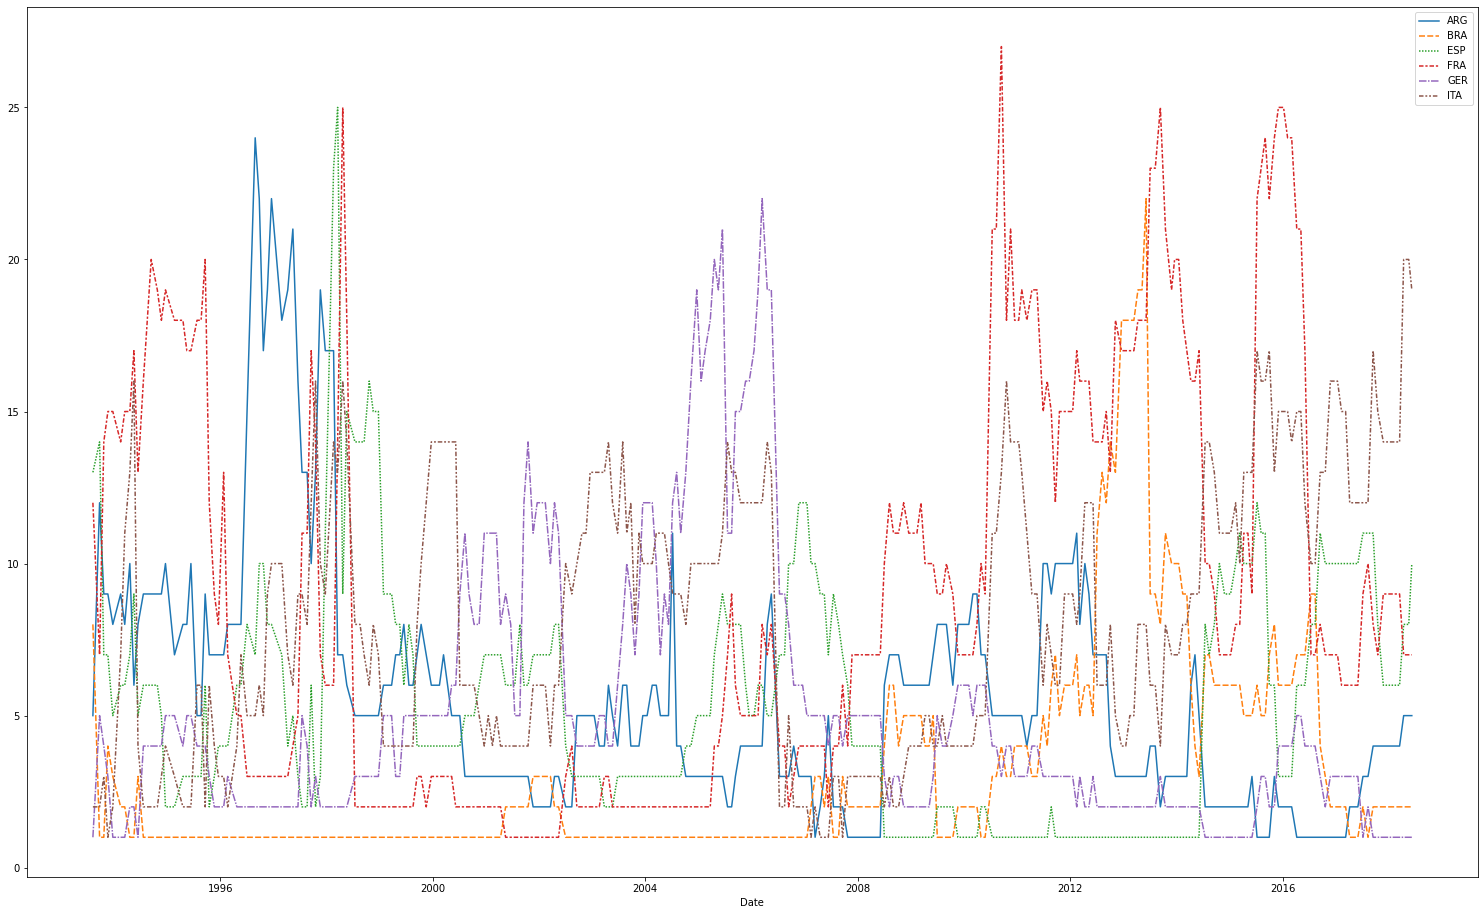

In [38]:
# Set the width and height of the figure
plt.figure(figsize=(26,16))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=fifa_data)

This code shouldn't make sense just yet, and you'll learn more about it in the upcoming tutorials.  For now, continue to your first exercise, where you'll get a chance to experiment with the coding environment yourself!

# What's next?

Write your first lines of code in the **[first coding exercise](https://www.kaggle.com/kernels/fork/3303713)**!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*